In [ ]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#원본 데이터
data_table = np.loadtxt('data-03-diabetes.csv', delimiter = ',', dtype = np.float32)
x_data = data_table[:, 0:-1]
y_data = data_table[:, [-1]]

x_data = np.array(x_data, dtype = np.float32)
y_data = np.array(y_data, dtype = np.float32)

#행렬 곱셈을 위해 차원을 일치시켜 줍니다.
W = tf.Variable(tf.random.normal([8, 1]))
b = tf.Variable(tf.random.normal([1]))

#Leaning rate : 0.005
learning_rate = 5e-3

#함수 정의
def logisticRegression():
  #자동미분함수를 사용하여 설계
  with tf.GradientTape() as tape:
    hyp = tf.sigmoid(tf.matmul(x_data, W) + b)
    cost = -tf.reduce_mean(y_data * tf.math.log(hyp) + (1 - y_data) * tf.math.log(1 - hyp))
    gradients = tape.gradient(cost,(W,b))
    tf.optimizers.SGD(learning_rate).apply_gradients(zip(gradients,(W,b)))

sigmoid_values = []
cost_values = []
accuaracy_values = []

#총 20000번의 학습을 진행
for step in range(20001):
  logisticRegression()
  hyp = tf.sigmoid(tf.matmul(x_data, W) + b)
  cost = -tf.reduce_mean(y_data * tf.math.log(hyp) + (1 - y_data) * tf.math.log(1 - hyp))

  #hyp의 출력값이 0.5보다 크면 1로 보정
  prediction = tf.cast(hyp > 0.5, dtype = tf.float32)

  #모델의 정확도 계산
  accuaracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_data), dtype = np.float32))

  accuaracy_values.append(accuaracy)
  sigmoid_values.append(hyp)
  cost_values.append(cost)

#2000번마다 학습 결과 출력
  if step % 2000 == 0:
    print("Step : ",step,
          "\n b = ",b.numpy(),
          "\n cost = ",cost.numpy(),
          "\n accuaracy = ", accuaracy.numpy(),
          "\n_________________________________")

#모델의 정확도를 백분율 값으로 출력
print("accuaracy score : %0.1f%%" %(accuaracy.numpy()*100))

Step :  0 
 b =  [-0.47633907] 
 cost =  0.6841529 
 accuaracy =  0.65480894 
_________________________________
Step :  2000 
 b =  [-0.7044366] 
 cost =  0.60059947 
 accuaracy =  0.685112 
_________________________________
Step :  4000 
 b =  [-0.68124044] 
 cost =  0.5608808 
 accuaracy =  0.71936756 
_________________________________
Step :  6000 
 b =  [-0.6429262] 
 cost =  0.5347088 
 accuaracy =  0.7338603 
_________________________________
Step :  8000 
 b =  [-0.6003724] 
 cost =  0.51713413 
 accuaracy =  0.743083 
_________________________________
Step :  10000 
 b =  [-0.5570485] 
 cost =  0.505075 
 accuaracy =  0.7536232 
_________________________________
Step :  12000 
 b =  [-0.5147351] 
 cost =  0.49662226 
 accuaracy =  0.75625825 
_________________________________
Step :  14000 
 b =  [-0.47434157] 
 cost =  0.49057975 
 accuaracy =  0.76679844 
_________________________________
Step :  16000 
 b =  [-0.43626133] 
 cost =  0.48618266 
 accuaracy =  0.7720685 
______

In [ ]:
# Test model
feature = []
for f in range(8):
  feature.append(float(input("Input feature%d data : " %f)))

x1 = np.array(feature, dtype = np.float32).reshape(1,8)
y1 = tf.sigmoid(tf.matmul(x1, W) + b)
print("\npredicted value : ", format(y1)) #보정하기 전 값 출력

#0.5보다 크면 1, 아니면 0으로 보정
correction = tf.cast(y1 > 0.5, dtype = tf.float32)
correction_np = correction.numpy().astype(np.float32)

#보정된 값 출력
print("correction value : ", end="")
if([0.] == correction_np):  print("0")
else: print("1")

Input feature0 data : -0.882353
Input feature1 data : -0.145729
Input feature2 data : 0.0819672
Input feature3 data : -0.414141
Input feature4 data : 0
Input feature5 data : -0.207153
Input feature6 data : -0.766866
Input feature7 data : -0.666667
predicted value :  [[0.9201354]]
correction value : 1


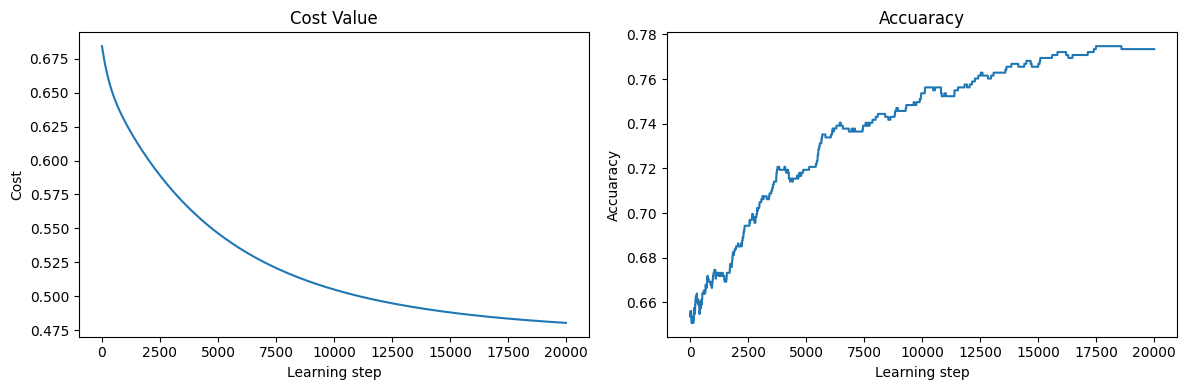

In [ ]:
#학습 단계에 따른 비용함수의 변화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Cost Value")
plt.xlabel("Learning step")
plt.ylabel("Cost")
plt.plot(range(20001), cost_values)

#학습 단계에 따른 모델 정확도의 변화
plt.subplot(1, 2, 2)
plt.title("Accuaracy")
plt.xlabel("Learning step")
plt.ylabel("Accuaracy")
plt.plot(range(20001), accuaracy_values)

plt.tight_layout()
plt.show()

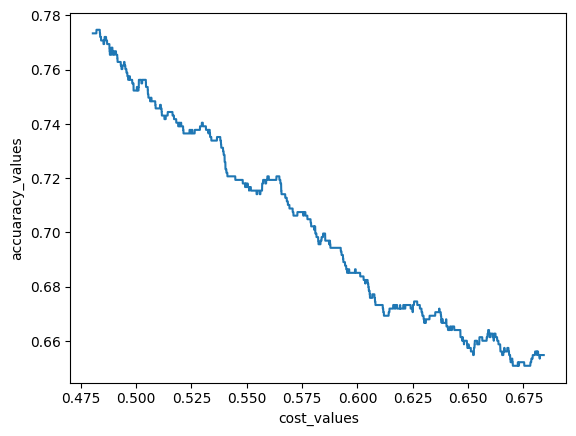

In [ ]:
#비용의 변화에 따른 정확도의 변화
plt.plot(cost_values, accuaracy_values)
plt.xlabel('cost_values')
plt.ylabel('accuaracy_values')
plt.show()